# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
## Test <a href=https://www.ramp.studio/problems/iris>RAMP on iris</a> 

## Introduction

Iris is a small standard multi-class classification data set from the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">UCI Machine Learning Repository</a>.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the dataset

We can use the utilities provided by `RAMP` to access the public train and test set.

In [2]:
import problem

First, let's have a quick look at the training data.

In [3]:
X_train, y_train = problem.get_train_data()

In [4]:
X_train.head()

,sepal length,sepal width,petal length,petal width
0,5.0,3.5,1.6,0.6
1,6.1,2.8,4.7,1.2
2,6.8,2.8,4.8,1.4
3,6.7,3.1,5.6,2.4
4,5.0,2.0,3.5,1.0


The data corresponds to some iris measurements: the length and width in centimeters of the sepal and petal of an iris, respectively. We expect that these measurements can give us a clue on which species an iris is belonging to. This information is stored in `y_train` which is the labels.

In [5]:
y_train[:5]

array(['setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

Thus, each line of the matrix `X_train` corresponds to an entry in the vector `y_train`. We could have a quick look at the data distribution to have an insight regarding the data and we can easily make some decision rules to automatically distinguish the different iris type.

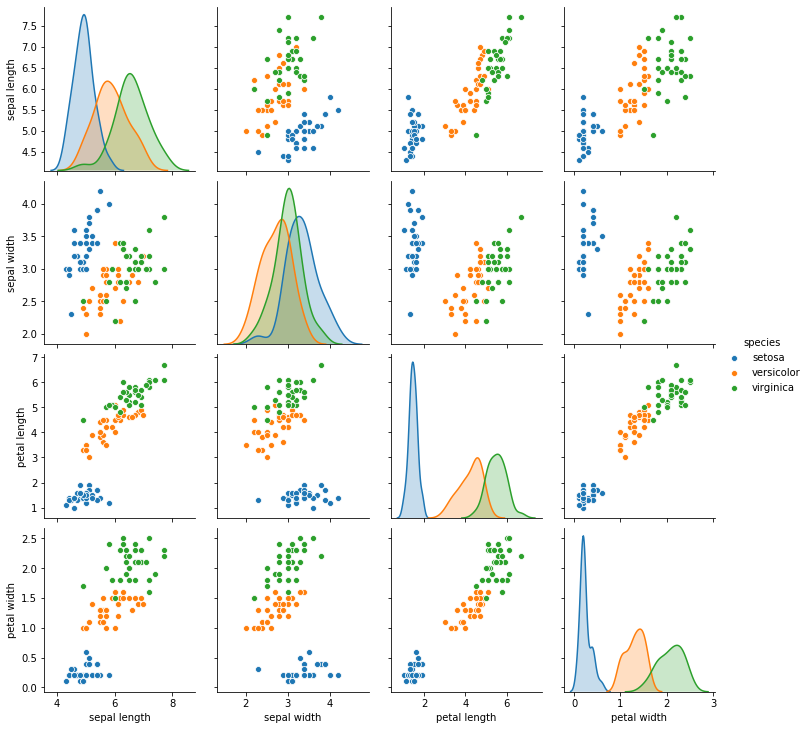

In [6]:
df_train = pd.concat(
    [X_train, pd.DataFrame({"species": y_train})],
    axis=1,
)
sns.pairplot(df_train, hue="species")

From a pair plot, we see that the setosa specie can easily be distinguish from the other two classes. The differentiation between the two other classes can be challenging in some cases.

We kept some left-out data which we can use as testing data to assess the discrimination perfomance of our learnt model in practice.

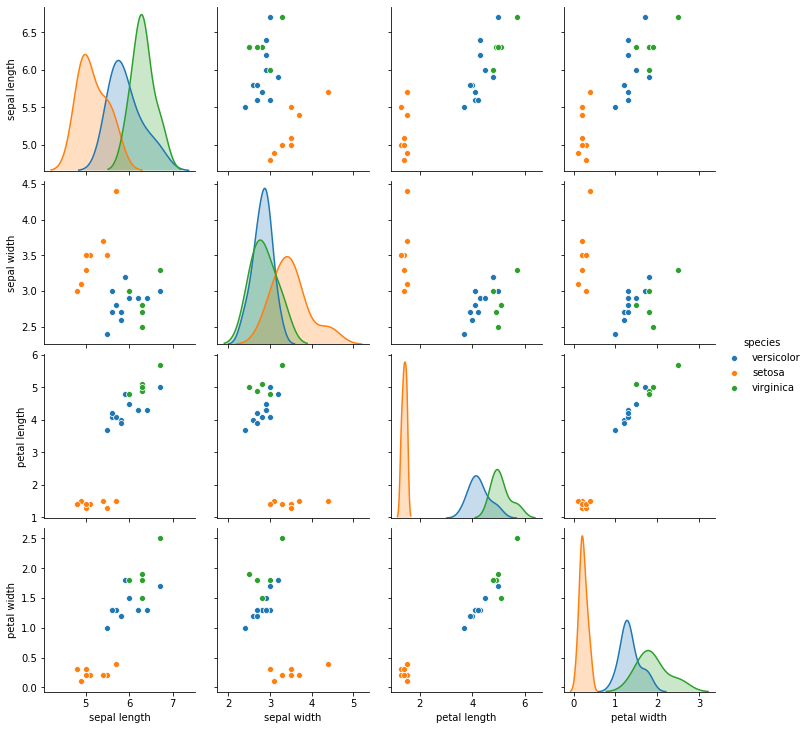

In [7]:
X_test, y_test = problem.get_test_data()
df_test = pd.concat(
    [X_test, pd.DataFrame({"species": y_test})],
    axis=1,
)
sns.pairplot(df_test, hue="species")

## Building predictive models

For submitting to the [RAMP site](https://ramp.studio), you will need to create a `estimator.py` file that defines a `get_estimator` function which returns a scikit-learn estimator.

The initial example classifier in your sandbox is:

In [8]:
from sklearn.ensemble import RandomForestClassifier


def get_estimator():
    clf = RandomForestClassifier(
        n_estimators=5, max_depth=5, random_state=61
    )
    return clf

When developing locally, you can use `scikit-learn` tools to test a given model.

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=57)
cross_val_score(get_estimator(), X_train, y_train, cv=cv)

array([0.95, 0.95])

You could easily train an test a model and the respective datasets.

In [10]:
model = get_estimator()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.875

## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html)

## Contact

Don't hesitate to [contact us](mailto:admin@ramp.studio?subject=iris notebook).